In [1]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
% matplotlib inline

# Making feature dataset after concatenation

In [2]:
def getDataframe(filepath):
    return pd.read_csv(filepath)

In [3]:
# Importing GSC-Features.csv file

gscFeaturesData = getDataframe("GSC-Features.csv")
print(gscFeaturesData.head(),"\n")
print(gscFeaturesData.shape)

           img_id  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...   f503  f504  f505  \
0  0001a_num1.png   0   0   0   0   0   0   0   0   0  ...      0     0     0   
1  0001a_num2.png   0   0   0   0   0   0   0   0   0  ...      0     0     0   
2  0001a_num3.png   0   0   0   0   0   0   0   0   0  ...      0     0     0   
3  0001a_num4.png   0   0   0   0   0   0   0   0   0  ...      0     0     0   
4  0001a_num5.png   0   0   0   0   0   0   0   0   0  ...      0     0     0   

   f506  f507  f508  f509  f510  f511  f512  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0  

[5 rows x 513 columns] 

(14072, 513)


In [4]:
# Importing same_pairs_gsc.csv file

samePair = getDataframe("same_pairs_gsc.csv")
print(samePair.head(),"\n")
print(samePair.shape)

         img_id_A        img_id_B  target
0  0001a_num1.png  0001a_num2.png       1
1  0001a_num1.png  0001a_num3.png       1
2  0001a_num1.png  0001a_num4.png       1
3  0001a_num1.png  0001a_num5.png       1
4  0001a_num1.png  0001b_num1.png       1 

(71531, 3)


In [5]:
print(samePair['img_id_A'].unique().shape)  # It tells the number of distinct images in img_id_A column
print(samePair['img_id_B'].unique().shape)  # It tells the number of distinct images in img_id_B column

# Both columns have 564 distinct images out of 791 images

(12539,)
(12539,)


In [6]:
# Importing diffn_pairs.csv file

diffnPair = getDataframe("diffn_pairs_gsc.csv")
print(diffnPair.head(),"\n")
print(diffnPair.shape)

         img_id_A        img_id_B  target
0  0001a_num1.png  0002a_num1.png       0
1  0001a_num1.png  0002a_num2.png       0
2  0001a_num1.png  0002a_num3.png       0
3  0001a_num1.png  0002a_num4.png       0
4  0001a_num1.png  0002b_num1.png       0 

(762557, 3)


In [7]:
# To make my feature dataset, here I am taking random 2000 samples from diffnPair dataframe so that I can concatenate same pair
# and different pair along row axis.

gscFeatures = pd.concat([samePair[:2000], diffnPair[:2000]])
print(gscFeatures.head(),"\n")  #  We can see in the target column, series of 1's is appearing and then series of 0's
print(gscFeatures.shape)

         img_id_A        img_id_B  target
0  0001a_num1.png  0001a_num2.png       1
1  0001a_num1.png  0001a_num3.png       1
2  0001a_num1.png  0001a_num4.png       1
3  0001a_num1.png  0001a_num5.png       1
4  0001a_num1.png  0001b_num1.png       1 

(4000, 3)


In [8]:
gsc = gscFeatures.values
np.random.shuffle(gsc)    # I have shuffled here

In [9]:
columnIndex = gscFeatures.columns
print(columnIndex)

Index(['img_id_A', 'img_id_B', 'target'], dtype='object')


In [10]:
gscFeatures =  pd.DataFrame(data = gsc,columns=columnIndex)
print(gscFeatures.head())

         img_id_A        img_id_B target
0  0003a_num1.png  0011b_num2.png      0
1  0030a_num1.png  0030b_num4.png      1
2  0038b_num5.png  0038c_num1.png      1
3  0008b_num1.png  0008c_num4.png      1
4  0005a_num2.png  0005a_num3.png      1


In [11]:
# To make gsc dataset after concatenation of features of image_A and image_B, we have to fetch features of image A
# and B from "gscFeaturesData" dataframe.

In [12]:
img_id_A = gscFeatures['img_id_A'].values
img_id_B = gscFeatures['img_id_B'].values

In [13]:
# To fetch the features we have to reset the index gscFeaturesData

features = gscFeaturesData.set_index(keys='img_id')
print(features.head())

                f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  ...   f503  f504  \
img_id                                                   ...                
0001a_num1.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0001a_num2.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0001a_num3.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0001a_num4.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0001a_num5.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   

                f505  f506  f507  f508  f509  f510  f511  f512  
img_id                                                          
0001a_num1.png     0     0     0     0     0     0     0     0  
0001a_num2.png     0     0     0     0     0     0     0     0  
0001a_num3.png     0     0     0     0     0     0     0     0  
0001a_num4.png     0     0     0     0     0     0     0     0  
0001a_num5.png     0     0     0     0     0     0     0     0  

[5 r

In [14]:
# Fetching Images_A features

img_id_A_features = features.loc[img_id_A]
print(img_id_A_features.head(),"\n")
print(img_id_A_features.shape)

                f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  ...   f503  f504  \
img_id                                                   ...                
0003a_num1.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0030a_num1.png   0   1   1   0   0   0   0   1   0    0  ...      0     0   
0038b_num5.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0008b_num1.png   0   1   1   0   1   0   0   0   0    0  ...      0     1   
0005a_num2.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   

                f505  f506  f507  f508  f509  f510  f511  f512  
img_id                                                          
0003a_num1.png     0     0     0     0     0     0     0     0  
0030a_num1.png     0     0     0     0     0     0     0     0  
0038b_num5.png     0     0     0     0     0     0     0     0  
0008b_num1.png     0     0     0     0     0     0     0     0  
0005a_num2.png     0     0     0     0     0     0     0     0  

[5 r

In [15]:
# Fetching Images_B features

img_id_B_features = features.loc[img_id_B]
print(img_id_B_features.head(),"\n")
print(img_id_B_features.shape)

                f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  ...   f503  f504  \
img_id                                                   ...                
0011b_num2.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0030b_num4.png   0   1   0   0   0   0   0   1   0    0  ...      0     0   
0038c_num1.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   
0008c_num4.png   0   0   0   0   0   0   0   0   0    0  ...      0     1   
0005a_num3.png   0   0   0   0   0   0   0   0   0    0  ...      0     0   

                f505  f506  f507  f508  f509  f510  f511  f512  
img_id                                                          
0011b_num2.png     0     0     0     0     0     0     0     0  
0030b_num4.png     0     0     0     0     0     0     0     0  
0038c_num1.png     0     0     0     0     0     0     0     0  
0008c_num4.png     0     0     0     0     0     0     0     0  
0005a_num3.png     0     0     0     0     0     0     0     0  

[5 r

In [16]:
imageIds = gscFeatures[['img_id_A', 'img_id_B']].values
target = gscFeatures[['target']].values

In [17]:
# Absolute difference of image_A features and image_B features
subtractedFeatures = np.abs(img_id_A_features.values - img_id_B_features.values)

In [18]:
# Concatenating all
subtractedFeatures = np.hstack((imageIds, subtractedFeatures, target)) 

In [19]:
Indexcol = ['img_id_A', 'img_id_B'] + list(img_id_A_features.columns) + ['target']

In [20]:
subtractedFeatures = pd.DataFrame(subtractedFeatures, columns = Indexcol)
print(subtractedFeatures.head())
print("\n",subtractedFeatures.shape)

         img_id_A        img_id_B f1 f2 f3 f4 f5 f6 f7 f8  ...   f504 f505  \
0  0003a_num1.png  0011b_num2.png  0  0  0  0  0  0  0  0  ...      0    0   
1  0030a_num1.png  0030b_num4.png  0  0  1  0  0  0  0  0  ...      0    0   
2  0038b_num5.png  0038c_num1.png  0  0  0  0  0  0  0  0  ...      0    0   
3  0008b_num1.png  0008c_num4.png  0  1  1  0  1  0  0  0  ...      0    0   
4  0005a_num2.png  0005a_num3.png  0  0  0  0  0  0  0  0  ...      0    0   

  f506 f507 f508 f509 f510 f511 f512 target  
0    0    0    0    0    0    0    0      0  
1    0    0    0    0    0    0    0      1  
2    0    0    0    0    0    0    0      1  
3    0    0    0    0    0    0    0      1  
4    0    0    0    0    0    0    0      1  

[5 rows x 515 columns]

 (4000, 515)


In [21]:
columnIndex = ""

for i in range(1,1025):
    columnIndex = columnIndex + 'f' + str(i) + ' '

In [22]:
ConcatenatedFeatures = np.hstack((imageIds, img_id_A_features.values, img_id_B_features.values, target)) 

In [23]:
ConcatenatedFeatures

array([['0003a_num1.png', '0011b_num2.png', 0, ..., 0, 0, 0],
       ['0030a_num1.png', '0030b_num4.png', 0, ..., 0, 0, 1],
       ['0038b_num5.png', '0038c_num1.png', 0, ..., 0, 0, 1],
       ...,
       ['0002a_num1.png', '0008b_num4.png', 0, ..., 0, 0, 0],
       ['0021c_num1.png', '0021c_num2.png', 0, ..., 0, 0, 1],
       ['0002a_num1.png', '0041b_num4.png', 0, ..., 0, 0, 0]],
      dtype=object)

In [24]:
col = ['img_id_A', 'img_id_B']+columnIndex.split() + ['target']  # Index of Columns 

In [25]:
ConcatenatedFeatures = pd.DataFrame(ConcatenatedFeatures, columns = col)
print(ConcatenatedFeatures.head(),"\n")
print(ConcatenatedFeatures.shape)

         img_id_A        img_id_B f1 f2 f3 f4 f5 f6 f7 f8  ...   f1016 f1017  \
0  0003a_num1.png  0011b_num2.png  0  0  0  0  0  0  0  0  ...       0     0   
1  0030a_num1.png  0030b_num4.png  0  1  1  0  0  0  0  1  ...       0     0   
2  0038b_num5.png  0038c_num1.png  0  0  0  0  0  0  0  0  ...       0     0   
3  0008b_num1.png  0008c_num4.png  0  1  1  0  1  0  0  0  ...       1     0   
4  0005a_num2.png  0005a_num3.png  0  0  0  0  0  0  0  0  ...       0     0   

  f1018 f1019 f1020 f1021 f1022 f1023 f1024 target  
0     0     0     0     0     0     0     0      0  
1     0     0     0     0     0     0     0      1  
2     0     0     0     0     0     0     0      1  
3     0     0     0     0     0     0     0      1  
4     0     0     0     0     0     0     0      1  

[5 rows x 1027 columns] 

(4000, 1027)


In [26]:
# Generation of target vector from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def getTargetVector(file):
    targetVec = file['target'].values
    return targetVec


# Generation of raw data matrix from ConcatenatedFeatures and subtractedFeatures for human observed data and GSC

def rawDataMatrix(file):
    rawData = file[file.columns].values
    return rawData[:,2:len(rawData[0])-1].T

In [27]:
# Creating the training target variable(70% of target variable)

def getTrainingTarget(rawTraining,TrainingPercent = 70): 
    TrainingLen = math.ceil(len(rawTraining)*(TrainingPercent*0.01))
    t = rawTraining[:TrainingLen]
    return t 


# Making the Training dataMatrix which is 70% of input dataset

def TrainingDataMatrix(rawData, TrainingPercent = 70): 
    T_len = math.ceil(len(rawData[0])*0.01*TrainingPercent)
    d2 = rawData[:,0:T_len]
    return d2 


# Making the Validation target(15% of input dataset)

def getValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData)*ValPercent*0.01)
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    return t


# Creating Validation dataMatrix(15% of input dataset)

def ValDataMatrix(rawData, ValPercent, TrainingCount): 
    valSize = math.ceil(len(rawData[0])*ValPercent*0.01)
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]  
    return dataMatrix 

In [28]:
def getBigSigma(Data,TrainingPercent):
    BigSigma    = np.zeros((len(Data),len(Data)))
    DataT       = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,TrainingLen):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]+0.2  # BigSigma is getting assigned diagonally by all values of varVect
        
    
    return BigSigma

In [29]:
def getScalar(DataRow,Mu, BigSigInv):  
    R = np.subtract(DataRow,Mu)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

def getRadialBasisOut(DataRow,Mu, BigSigInv):    
    phi_x = math.exp(-0.5*getScalar(DataRow,Mu,BigSigInv))
    return phi_x

def getPhiMatrix(Data, Mu, BigSigma, TrainingPercent = 70):
    DataT = np.transpose(Data) 
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    PHI = np.zeros((TrainingLen,len(Mu))) 
    BigSigInv = np.linalg.inv(BigSigma) 
    for  C in range(len(Mu)):
        for R in range(TrainingLen):
            PHI[R][C] = getRadialBasisOut(DataT[R], Mu[C], BigSigInv)
    
    return PHI

In [30]:
def getWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    return W 

In [31]:
def getValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y


# rms = root mean square

def getErms(VAL_TEST_OUT,ValDataAct): 
    sum = 0.0
    accuracy = 0.0
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

# Preparing Dataset

In [32]:
# For concatenatedFeatures Dataset

RawTargetConcat = getTargetVector(ConcatenatedFeatures)
RawDataConcat   = rawDataMatrix(ConcatenatedFeatures)


# For subtractedFeatures Dataset 

RawTargetSubtract = getTargetVector(subtractedFeatures)
RawDataSubtract   = rawDataMatrix(subtractedFeatures)

# Preparing Training Data

In [33]:
# For concatenatedFeatures Dataset

TrainingPercent=70
TrainingTargetConcat = getTrainingTarget(RawTargetConcat,TrainingPercent)
TrainingDataConcat   = TrainingDataMatrix(RawDataConcat,TrainingPercent)
print(TrainingTargetConcat.shape)
print(TrainingDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TrainingTargetSubtract = getTrainingTarget(RawTargetSubtract,TrainingPercent)
TrainingDataSubtract   = TrainingDataMatrix(RawDataSubtract,TrainingPercent)
print(TrainingTargetSubtract.shape)
print(TrainingDataSubtract.shape)

(2801,)
(1024, 2800)

(2801,)
(512, 2800)


# Preparing Validation Data

In [34]:
# For concatenatedFeatures Dataset

ValidationPercent= 15
ValDataActConcat = getValTargetVector(RawTargetConcat,ValidationPercent, (len(TrainingTargetConcat)))
ValDataConcat    = ValDataMatrix(RawDataConcat,ValidationPercent, (len(TrainingTargetConcat)))
print(ValDataActConcat.shape)
print(ValDataConcat.shape)

print()
# For subtractedFeatures Dataset 

ValDataActSubtract = getValTargetVector(RawTargetSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
ValDataSubtract   = ValDataMatrix(RawDataSubtract,ValidationPercent, (len(TrainingTargetSubtract)))
print(ValDataActSubtract.shape)
print(ValDataSubtract.shape)

(599,)
(1024, 599)

(599,)
(512, 599)


# Preparing Test Data

In [35]:
# For concatenatedFeatures Dataset

TestPercent = 15
TestDataActConcat = getValTargetVector(RawTargetConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
TestDataConcat = ValDataMatrix(RawDataConcat,TestPercent, (len(TrainingTargetConcat)+len(ValDataActConcat)))
print(TestDataActConcat.shape)
print(TestDataConcat.shape)

print()
# For subtractedFeatures Dataset 

TestDataActSubtract = getValTargetVector(RawTargetSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
TestDataSubtract = ValDataMatrix(RawDataSubtract,TestPercent, (len(TrainingTargetSubtract)+len(ValDataActSubtract)))
print(TestDataActSubtract.shape)
print(TestDataSubtract.shape)

(599,)
(1024, 599)

(599,)
(512, 599)


Text(0.5, 1.0, 'WCSS Vs. Number of clusters M')

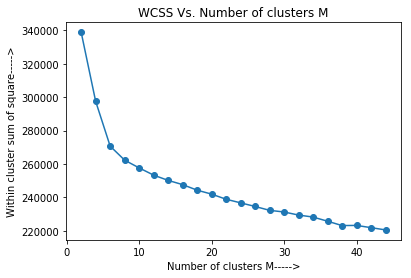

In [36]:
# For concatenatedFeatures Dataset

k_list = [2*M for M in range(1,23)]
WCSS = [] # Within cluster sum of square
for M in tqdm_notebook(k_list):
    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataConcat))
    WCSS.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_list,WCSS,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

Text(0.5, 1.0, 'WCSS Vs. Number of clusters M')

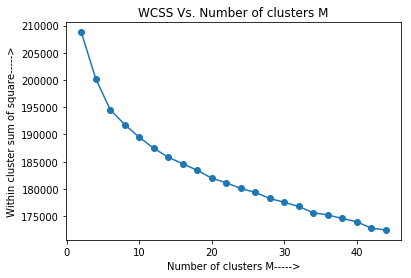

In [37]:
# For subtractedFeatures Dataset

k_list_ = [2*M for M in range(1,23)]
WCSS_ = [] # Within cluster sum of square
for M in tqdm_notebook(k_list_):
    kmeans_ = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingDataSubtract))
    WCSS_.append(kmeans_.inertia_)

# Elbow Method
plt.plot(k_list_,WCSS_,'o-')
plt.xlabel("Number of clusters M----->")
plt.ylabel("Within cluster sum of square----->")
plt.title("WCSS Vs. Number of clusters M")

# Closed form Solution

In [38]:
C_Lambda = 0.3
TrainingPercent = 70
ValidationPercent = 15
TestPercent = 15


# For concatenatedFeatures Dataset

kmeans = KMeans(n_clusters=7, random_state=0).fit(np.transpose(TrainingDataConcat))

Mu_c = kmeans.cluster_centers_
BigSigmaConcat      = getBigSigma(RawDataConcat, TrainingPercent)
TRAINING_PHI_Concat = getPhiMatrix(RawDataConcat, Mu_c, BigSigmaConcat, TrainingPercent)
W_Concat            = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,(C_Lambda)) 
TEST_PHI_Concat     = getPhiMatrix(TestDataConcat, Mu_c, BigSigmaConcat,100) 
VAL_PHI_Concat      = getPhiMatrix(ValDataConcat, Mu_c, BigSigmaConcat,100)


# For subtractedFeatures Dataset 

kmeans_ = KMeans(n_clusters=14, random_state=0).fit(np.transpose(TrainingDataSubtract))

Mu_ = kmeans_.cluster_centers_
BigSigmaSubtract      = getBigSigma(RawDataSubtract, TrainingPercent)
TRAINING_PHI_Subtract = getPhiMatrix(RawDataSubtract, Mu_, BigSigmaSubtract, TrainingPercent)
W_Subtract            = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,(C_Lambda)) 
TEST_PHI_Subtract     = getPhiMatrix(TestDataSubtract, Mu_, BigSigmaSubtract,100) 
VAL_PHI_Subtract      = getPhiMatrix(ValDataSubtract, Mu_, BigSigmaSubtract,100)

In [39]:
# For concatenatedFeatures Dataset

print(Mu_c.shape)
print(BigSigmaConcat.shape)
print(TRAINING_PHI_Concat.shape)
print(W_Concat.shape)
print(VAL_PHI_Concat.shape)
print(TEST_PHI_Concat.shape)
print()

# For subtractedFeatures Dataset 

print(Mu_.shape)
print(BigSigmaSubtract.shape)
print(TRAINING_PHI_Subtract.shape)
print(W_Subtract.shape)
print(VAL_PHI_Subtract.shape)
print(TEST_PHI_Subtract.shape)

(7, 1024)
(1024, 1024)
(2801, 7)
(7,)
(599, 7)
(599, 7)

(14, 512)
(512, 512)
(2801, 14)
(14,)
(599, 14)
(599, 14)


Text(0.5, 1.0, 'Training Accuracy Vs. Lamda')

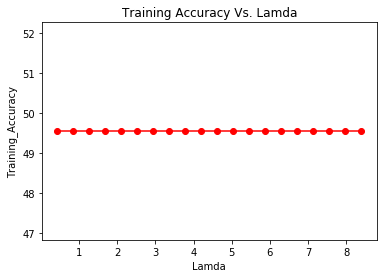

In [40]:
# To choose a value of regularization parameter(Lamda) with COncatenated training set

Lamda=[lamda*0.42 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Concat,TrainingTargetConcat,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Concat,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetConcat))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

Text(0.5, 1.0, 'Training Accuracy Vs. Lamda')

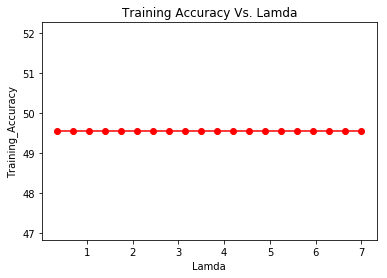

In [41]:
# To choose a value of regularization parameter(Lamda) with Subtracted training set

Lamda=[lamda*0.35 for lamda in range(1,21)]
Training_Accuracy = []
for lamda in Lamda:
  Weight = getWeightsClosedForm(TRAINING_PHI_Subtract,TrainingTargetSubtract,lamda) 
  TR_TEST_OUT  = getValTest(TRAINING_PHI_Subtract,Weight)
  TrainingAcc= str(getErms(TR_TEST_OUT,TrainingTargetSubtract))
  Training_Accuracy.append(float(TrainingAcc.split(',')[0]))
plt.plot(Lamda,Training_Accuracy,'ro-')
plt.ylabel("Training_Accuracy")
plt.xlabel("Lamda")
plt.title("Training Accuracy Vs. Lamda")

# Finding Erms on training, validation and test set

In [54]:
# For concatenatedFeatures Dataset

TR_TEST_OUT_Concat  = getValTest(TRAINING_PHI_Concat,W_Concat)
VAL_TEST_OUT_Concat = getValTest(VAL_PHI_Concat,W_Concat)
TEST_OUT_Concat     = getValTest(TEST_PHI_Concat,W_Concat)

TrainingAccuracy_Concat   = str(getErms(TR_TEST_OUT_Concat,TrainingTargetConcat))
ValidationAccuracy_Concat = str(getErms(VAL_TEST_OUT_Concat,ValDataActConcat))
TestAccuracy_Concat       = str(getErms(TEST_OUT_Concat,TestDataActConcat))

# For subtractedFeatures Dataset 

TR_TEST_OUT_Subtract  = getValTest(TRAINING_PHI_Subtract,W_Subtract)
VAL_TEST_OUT_Subtract = getValTest(VAL_PHI_Subtract,W_Subtract)
TEST_OUT_Subtract     = getValTest(TEST_PHI_Subtract,W_Subtract)

TrainingAccuracy_Subtract   = str(getErms(TR_TEST_OUT_Subtract,TrainingTargetSubtract))
ValidationAccuracy_Subtract = str(getErms(VAL_TEST_OUT_Subtract,ValDataActSubtract))
TestAccuracy_Subtract      = str(getErms(TEST_OUT_Subtract,TestDataActSubtract))

In [55]:
# For concatenatedFeatures Dataset

print("# Accuracy of concatenatedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Concat.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Concat.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Concat.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Concat.split(',')[1]))+"\n\n\n")


# For subtractedFeatures Dataset 

print("# Accuracy of subtractedFeatures Dataset\n")

print("Training accuracy   = " + TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " +  ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " +  TestAccuracy_Subtract.split(',')[0]+"\n")

print ("E_rms Training   = " + str(float(TrainingAccuracy_Subtract.split(',')[1])))
print ("E_rms Validation = " + str(float(ValidationAccuracy_Subtract.split(',')[1])))
print ("E_rms Testing    = " + str(float(TestAccuracy_Subtract.split(',')[1])))

# Accuracy of concatenatedFeatures Dataset

Training accuracy   = 49.553730810424845
Validation accuracy = 52.75459098497496
Test accuracy       = 49.41569282136895

E_rms Training   = 0.7102553709024322
E_rms Validation = 0.6873529589303086
E_rms Testing    = 0.7112264560506102



# Accuracy of subtractedFeatures Dataset

Training accuracy   = 49.553730810424845
Validation accuracy = 52.75459098497496
Test accuracy       = 49.41569282136895

E_rms Training   = 0.7102553709024322
E_rms Validation = 0.6873529589303086
E_rms Testing    = 0.7112264560506102


# Gradient Descent Solution

In [56]:
# For Concatenated features dataset

W_Now        = np.dot(220, W_Concat) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D     = -np.dot((TrainingTargetConcat[i] - np.dot(np.transpose(W_Now),TRAINING_PHI_Concat[i])),TRAINING_PHI_Concat[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Concat,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActConcat)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Concat,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActConcat)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5, 1.0, 'Training_Erms Vs. Learningrate')

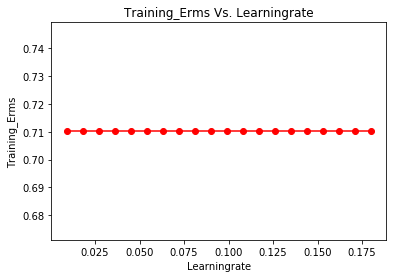

In [57]:
# To find the learning rate for Concatenated features

Learningrate = [0.009*i for i in range(1,21)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Concat,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetConcat)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [58]:
print ('----------Gradient Descent Solution for Concatenated features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Concat.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Concat.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Concat.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Concatenated features--------------------
Accuracy
Training accuracy   = 49.553730810424845
Validation accuracy = 52.75459098497496
Test accuracy       = 49.41569282136895

E_rms Training   = 0.71026
E_rms Validation = 0.68735
E_rms Testing    = 0.71123


In [59]:
# For Subtracted features dataset

W_Now_       = np.dot(220, W_Subtract) # It intializes with random value
La           = 2 # Lamda
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,400):
    
    #print ('---------Iteration: ' + str(i) + '--------------')
    Delta_E_D_     = -np.dot((TrainingTargetSubtract[i] - np.dot(np.transpose(W_Now_),TRAINING_PHI_Subtract[i])),TRAINING_PHI_Subtract[i])
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D_,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now_         = W_T_Next
    
    #-----------------TrainingData Accuracy---------------------#
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    #-----------------ValidationData Accuracy---------------------#
    VAL_TEST_OUT  = getValTest(VAL_PHI_Subtract,W_T_Next) 
    Erms_Val      = getErms(VAL_TEST_OUT,ValDataActSubtract)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    #-----------------TestingData Accuracy---------------------#
    TEST_OUT      = getValTest(TEST_PHI_Subtract,W_T_Next) 
    Erms_Test = getErms(TEST_OUT,TestDataActSubtract)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

Text(0.5, 1.0, 'Training_Erms Vs. Learningrate')

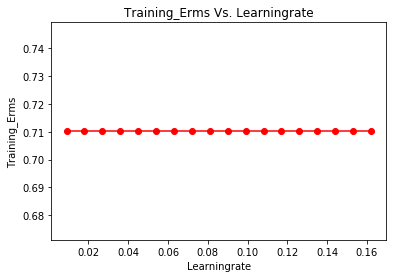

In [62]:
# To find the learning rate for Subtracted features

Learningrate = [0.009*i for i in range(1,19)]
Training_Erms=[]
for l in Learningrate:
    
    La_Delta_E_W  = np.dot(La,W_Now_)
    Delta_E       = np.add(Delta_E_D_,La_Delta_E_W)    
    Delta_W       = -np.dot(l,Delta_E)
    W_T_Next      = W_Now_ + Delta_W
    W_Now_         = W_T_Next
    
    TR_TEST_OUT   = getValTest(TRAINING_PHI_Subtract,W_T_Next) 
    Erms_TR       = getErms(TR_TEST_OUT,TrainingTargetSubtract)
    Training_Erms.append(float(Erms_TR.split(',')[1]))

    
plt.plot(Learningrate,Training_Erms,'ro-')
plt.ylabel("Training_Erms")
plt.xlabel("Learningrate")
plt.title("Training_Erms Vs. Learningrate")

In [63]:
print ('----------Gradient Descent Solution for Subtracted features--------------------')
print("Accuracy")
print("Training accuracy   = " +TrainingAccuracy_Subtract.split(',')[0])
print("Validation accuracy = " + ValidationAccuracy_Subtract.split(',')[0])
print("Test accuracy       = " + TestAccuracy_Subtract.split(',')[0]+"\n")
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution for Subtracted features--------------------
Accuracy
Training accuracy   = 49.553730810424845
Validation accuracy = 52.75459098497496
Test accuracy       = 49.41569282136895

E_rms Training   = 0.71026
E_rms Validation = 0.68735
E_rms Testing    = 0.71123


# Logistic Regression

In [64]:
# We have our desirable dataset ConcatenaatedFeatures and SubtractedFearures

In [65]:
# Creating bias term
Bias = pd.DataFrame(np.ones((len(ConcatenatedFeatures),1)), columns = ['Bias'])

In [66]:
# For ConccatenatedFeatures

ConcatenatedFeatures_ = pd.concat([Bias, ConcatenatedFeatures[ConcatenatedFeatures.columns[2:-1]]], axis=1)
ConcatenatedFeatures_.shape

(4000, 1025)

In [67]:
ConcatenatedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# For SubtractedFeatures
subtractedFeatures_ = pd.concat([Bias, subtractedFeatures[subtractedFeatures.columns[2:-1]]], axis=1)
subtractedFeatures_.shape

(4000, 513)

In [69]:
subtractedFeatures_.head()

,Bias,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# For concatenatedfeatures
weight = np.zeros(1025)  # Bceause 1025 is the number of features including bias

In [71]:
def sigmoidFunction(inputData, weight):
    sigmoid = 1/(np.exp(-1 * np.matmul(inputData, weight)))
    return sigmoid

In [72]:
def cost_function(m,data,weight,Target):
    J = 1/m*(-1*Target.T.dot(np.log(sigmoidFunction(data,weight))) - (1 - Target).T.dot(np.log(1-sigmoidFunction(data,weight))))
    return J

In [73]:
def gd(m,weight,X, Target, Learningrate): # gd stands for Gradient Descent
    cost_functionList = [0]* 100 
    for i in tqdm_notebook(range(100)):
        weight = weight - (Learningrate/m) * ( X.T.dot((sigmoidFunction(X,weight) - Target)))
        cost = cost_function(m,X,weight,Target)
        cost_functionList[i] = cost
    return weight, cost_functionList

In [74]:
# For ConcatenatedFeatures training set
m = len(ConcatenatedFeatures_) # number of training examples
Target_ = ConcatenatedFeatures['target'].values.astype(float)
TrainingPercent = int((80/100)*len(Target_))
Target = Target_[:TrainingPercent]
Learningrate = 0.004
X_ = ConcatenatedFeatures_.values.astype(float)
concatInput = X_[:TrainingPercent]
New_weight_concat, costList_concat = gd(m,weight,concatInput,Target,Learningrate)

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [75]:
# For subtractedFeatures

weight_subtract = np.zeros(513)  # Bceause 513 is the number of features including bias

In [76]:
# For subtractedFeatures training set

Learningrate_ = 0.055
X_subtract = subtractedFeatures_.values.astype(float)
subtractInput = X_subtract[:TrainingPercent]
New_weight_subtract, costList_subtract = gd(m,weight_subtract,subtractInput,Target,Learningrate_)

C:\Users\abhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [77]:
# For concatenated test set

predict_concat = sigmoidFunction(X_[TrainingPercent+1:],New_weight_concat)

# For subtracted test set

predict_subtract = sigmoidFunction(X_subtract[TrainingPercent+1:],New_weight_subtract)

In [78]:
def estimatedOutput(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if np.around(predict[i]) == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [79]:
# For concatenatedfeatures
Target_concat = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_concat,Target_concat)
print("Accuracy is " + str(Right/len(Target_concat)*100))
print("Error is " + str(Wrong/len(Target_concat)*100))


print()
# For subtractedfeatures

Target_subtract = Target_[TrainingPercent+1:]
Right, Wrong = estimatedOutput(predict_subtract,Target_subtract)
print("Accuracy is " + str(Right/len(Target_subtract)*100))
print("Error is " + str(Wrong/len(Target_subtract)*100))

Accuracy is 96.87108886107634
Error is 3.128911138923655

Accuracy is 90.86357947434293
Error is 9.136420525657071


Text(0.5, 1.0, 'Cost funcion J Vs. Iterations')

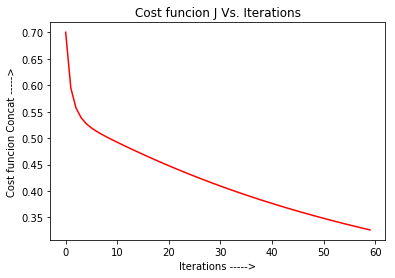

In [80]:
# For Concatenated set

Iterations = list(range(100))
plt.plot(Iterations,costList_concat,'r-')
plt.ylabel("Cost funcion Concat ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

Text(0.5, 1.0, 'Cost funcion J Vs. Iterations')

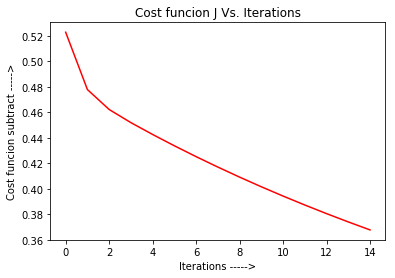

In [81]:
# For Subtracted set

Iterations = list(range(100))
plt.plot(Iterations,costList_subtract,'r-')
plt.ylabel("Cost funcion subtract ----->")
plt.xlabel("Iterations ----->")
plt.title("Cost funcion J Vs. Iterations")

# Artificial Neural Network

In [82]:
ConcatenatedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023,f1024,target
0,0003a_num1.png,0011b_num2.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0030a_num1.png,0030b_num4.png,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0038b_num5.png,0038c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0008b_num1.png,0008c_num4.png,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0005a_num2.png,0005a_num3.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
subtractedFeatures.head()

,img_id_A,img_id_B,f1,f2,f3,f4,f5,f6,f7,f8,...,f504,f505,f506,f507,f508,f509,f510,f511,f512,target
0,0003a_num1.png,0011b_num2.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0030a_num1.png,0030b_num4.png,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0038b_num5.png,0038c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0008b_num1.png,0008c_num4.png,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0005a_num2.png,0005a_num3.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Training The Model

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# For concatenated set

X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(ConcatenatedFeatures_.values[:,1:], ConcatenatedFeatures['target'].values,test_size =0.2,random_state=0)

In [86]:
# For subtracted set

X_train_subtract, X_test_subtract, y_train_subtract, y_test_subtract = train_test_split(subtractedFeatures_.values[:,1:], subtractedFeatures['target'].values,test_size =0.2,random_state=0)

In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [88]:
# Initialising the ANN

In [89]:
classifier_concat = Sequential()
classifier_subtract =Sequential()

In [90]:
# Adding the input layer and the first hidden layer

In [91]:
# For concatenated dataset

classifier_concat.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=1024))

# For subtracted dataset

classifier_subtract.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=512))

In [92]:
# For concatenated dataset

classifier_concat.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

# For subtracted dataset

classifier_subtract.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

In [93]:
# Compiling the ANN

In [94]:
# For concatenated dataset

classifier_concat.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

# For subtracted dataset

classifier_subtract.compile(optimizer='sgd',loss ='binary_crossentropy', metrics=['accuracy'])

In [97]:
# fitting the ANN to the Training set

# For concatenated Dataset
classifier_concat.fit(X_train_concat,y_train_concat,batch_size=128,epochs=50,verbose=0)

In [98]:
# fitting the ANN to the Training set

# For subtracted Dataset
classifier_subtract.fit(X_train_subtract,y_train_subtract,batch_size=24,epochs=50,verbose=0)

In [99]:
# For concatenated Dataset

y_pred_concat = classifier_concat.predict(X_test_concat)

# For subtracted Dataset

y_pred_subtract = classifier_subtract.predict(X_test_subtract)

In [100]:
y_pred_concat = (y_pred_concat > 0.5)
y_pred_concat =y_pred_concat.astype(int)
y_pred_concat = [y_pred_concat[i][0] for i in range(len(y_pred_subtract))]

y_pred_subtract = (y_pred_subtract > 0.5)
y_pred_subtract = y_pred_subtract.astype(int)
y_pred_subtract = [y_pred_subtract[i][0] for i in range(len(y_pred_subtract))]

In [101]:
def evaluation(predict,Target):
    right = 0
    wrong = 0
    
    for i in range(len(Target)):
        if predict[i] == Target[i]:
            right += 1
        else:
            wrong +=1
    return right, wrong

In [102]:
# For concatenatedfeatures

Right_concat, Wrong_concat = evaluation(y_pred_concat,y_test_concat)
print("Accuracy is " + str(Right_concat/len(y_test_concat)*100))
print("Error is " + str(Wrong_concat/len(y_test_concat)*100))

print()
# For subtractedfeatures

Right_subtract, Wrong_subtract = evaluation(y_pred_subtract,y_test_subtract)
print("Accuracy is " + str(Right_subtract/len(y_test_subtract)*100))
print("Error is " + str(Wrong_subtract/len(y_test_subtract)*100))

Accuracy is 98.375
Error is 1.625

Accuracy is 97.0
Error is 3.0
